<a href="https://colab.research.google.com/github/Gustavo-Ros/Simulacion-1/blob/main/Inventario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import random as rnd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

In [3]:
def demanda():                            #Esta función calcula y devuelve la demanda
  prob=[0,0.01,0.025,0.045,0.065, 0.087,0.11,0.135,0.162,0.19,0.219,0.254,0.299,0.359,0.424,0.494,0.574,0.649,0.719,0.784,0.844, 0.894,0.934,0.964,0.980,0.995,1]
  u=rnd.random()
  for i in range(len(prob)):
      if prob[i-1] <= u <= prob[i]:       #Ubica el valor de u en inervalos
          x=i+34                          #Asigna valor de demanda
          break
  return x,u

In [4]:
def demanda_ajustada(x,mes):              #Esta fución calcula y devuelve la demanda ajustada
  factor_mes=[1.2, 1, 0.9, 0.8, 0.8 ,0.7, 0.8, 0.9, 1, 1.2, 1.3, 1.4]
  for j in range(len(factor_mes)):
    if mes==j:                            #Ubica el mes
      x=round(x*factor_mes[j-1])          #multiplica por el factor
  return x

In [5]:
def entrega(carga_pend):                  #Esta función calcula y devuelve el tiempo de entrega (y estatus de entrega pendiente)
  carga_pend=True                         #Indica que hay entrega pendiente

  v=rnd.random()
  if 0<= v < 0.3:                         #Asigna valor a el tiempo de entrega
    entrega=1
  elif 0.3 <= v < 0.7:
    entrega=2
  elif 0.7 <= v < 1:
    entrega=3

  return  entrega,carga_pend


In [6]:
#Asigna valores iniciales

inv_inicial=150
inventario_i=[150]                          #Guarda inventario inicial en una lista

carga_pend=False                            #Indica que no hay carga pendiente
t_entrega=0                                 #No hay tiempo de entrega
cont=-1                                     #Contador para recibir la entrega (inicia en -1 para comenzar a contar desde la sig. iteracion)
faltante=0                                  #Demanda faltante
data=[]                                     #Lista para imprimir tabla

for m in range(12):                         #Ciclo de 12 meses
  mes=m+1
  dem,val=demanda()                         #Calcula demanda y número aleatorio generado para el mes correspondiente
  dem_ajus=demanda_ajustada(dem,mes)        #Calcula demanda ajustada

  inv_final=inv_inicial-dem_ajus            #Calcula demanda final
  inv_men_prom=(inv_inicial+dem_ajus)/2     #Calcula demanda promedio mensual



  if inv_final<=100 and carga_pend==False:    #Condición: Se pasó el punto de reorden y no hay carga pendiente
    t_entrega,carga_pend=entrega(carga_pend)  #Calucla tiempo de entrega

  if carga_pend==True:                        #Contador para recibir la entrega aumenta en 1
    cont+=1

  if inv_final<0:                             #Si el inventario final es negativo, se imprime "-"
    faltante=abs(inv_final)
    data.append([f"{mes}",f"{inv_inicial}", f"{val}", f"{dem}",f"{dem_ajus}", "-",f"{faltante}",f"{t_entrega}",f"{inv_men_prom}"])
  else:
    data.append([f"{mes}",f"{inv_inicial}", f"{val}", f"{dem}",f"{dem_ajus}", f"{inv_final}",f"{faltante}",f"{t_entrega}",f"{inv_men_prom}"])

  inv_inicial=inv_final                       #Inventario final pasa a ser inventario incial en el siguiente mes

  if cont==t_entrega:                         #Condición: Se cumple tiempo de entrega
    cont=-1                                   #Reinicia contador
    inv_inicial+=200                          #Aumenta el inventario +200
    carga_pend=False                          #Indica que ya no hay carga pendiente
    t_entrega=0                               #Reinicia tiempo de entrega

  faltante=0                                  #Reinicia inv. faltante
  inventario_i.append(inv_inicial)            #Guarda inventario inicial en una lista

#Imprime tabla
headers = ['Mes', 'Inventario inicial' ,'No. aleatorio' ,'Demanda' ,'Demanda ajustada' , 'Inventario final','Faltante', 'Entrega', 'Inventario mensual promedio']
print(tabulate(data, headers=headers, tablefmt="fancy_grid",showindex=False))


╒═══════╤══════════════════════╤═════════════════╤═══════════╤════════════════════╤════════════════════╤════════════╤═══════════╤═══════════════════════════════╕
│   Mes │   Inventario inicial │   No. aleatorio │   Demanda │   Demanda ajustada │ Inventario final   │   Faltante │   Entrega │   Inventario mensual promedio │
╞═══════╪══════════════════════╪═════════════════╪═══════════╪════════════════════╪════════════════════╪════════════╪═══════════╪═══════════════════════════════╡
│     1 │                  150 │       0.440225  │        49 │                 59 │ 91                 │          0 │         3 │                         104.5 │
├───────┼──────────────────────┼─────────────────┼───────────┼────────────────────┼────────────────────┼────────────┼───────────┼───────────────────────────────┤
│     2 │                   91 │       0.473187  │        49 │                 49 │ 42                 │          0 │         3 │                          70   │
├───────┼───────────────────

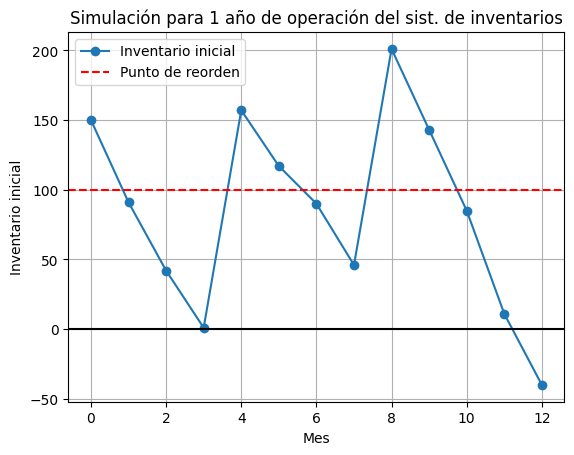

In [9]:
#Imprime gráfica
plt.plot(inventario_i, marker='o', label="Inventario inicial")
plt.title('Simulación para 1 año de operación del sist. de inventarios')
plt.xlabel('Mes')
plt.ylabel('Inventario inicial')
plt.axhline(100, color="red",linestyle='--', label='Punto de reorden')
plt.axhline(0, color='black')
plt.grid(True)
plt.legend()
plt.show()